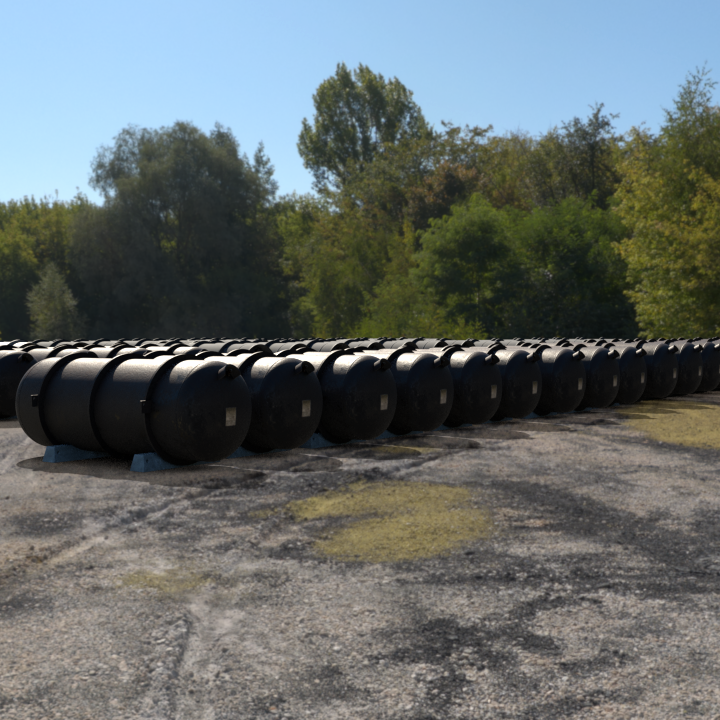

In [1]:
from IPython.display import display
import limbo.data

dataset = limbo.data.Dataset("../data")

sample = dataset[2]

if sample.image:
    display(sample.image)

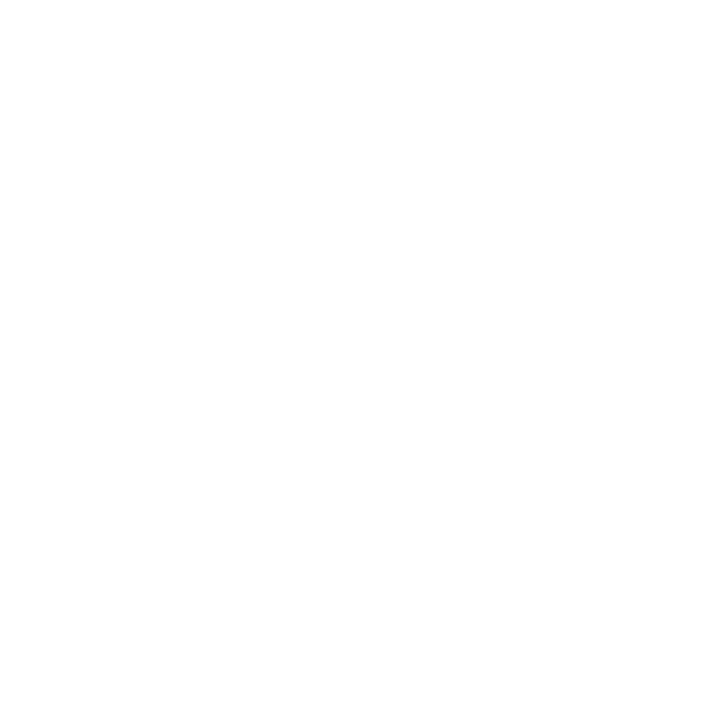

In [6]:
if sample.synthetic:
    display(sample.synthetic.depth)

In [8]:
depth = sample.synthetic.depth.layers["Z"].data.squeeze()
depth.min(), depth.max()

(4.8908067, 3690.8577)

Note that the furthest pixels in the image are over three kilometers away (!) and clearly must be sky.  Let's focus on everything within the nearest 50 meters, and remap the distance to a white-to-black colormap:

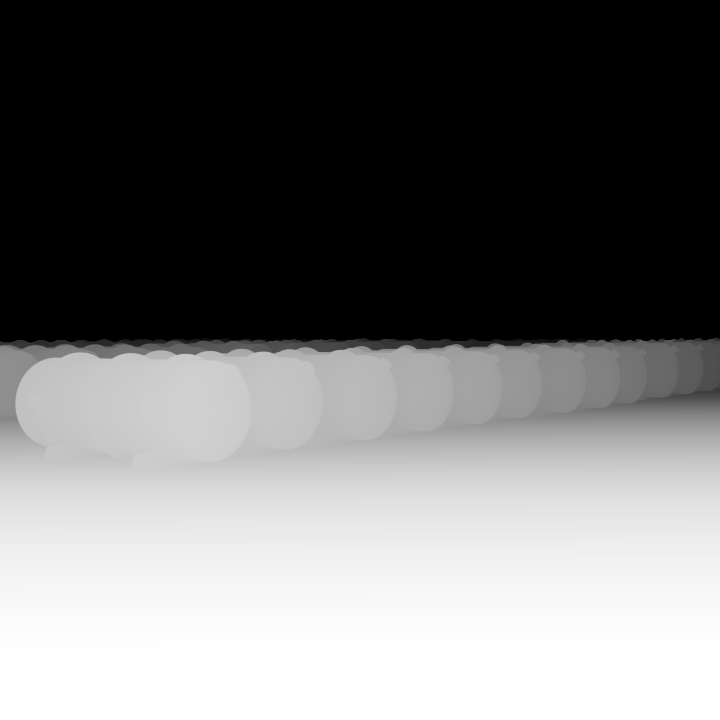

In [19]:
import imagecat.color.brewer
import PIL.Image

palette = imagecat.color.brewer.palette("Greys", reverse=True)
visible = imagecat.color.linear_map(depth, palette, min=6, max=50)
visible = (visible * 255).astype("ubyte")
PIL.Image.fromarray(visible)

Now we can see that the depth information makes sense, with brighter pixels representing surfaces that are closer to the camera.

Since lidar information is typically much lower-resolution than visible wavelength data, and may have a narrow range of detectable distances based on time-of-flight, we assume that researchers will need to spatially downsample the depth data to match whatever real-world sensors they are targeting.